In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Imputer, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, SelectKBest, f_classif, f_regression
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train_DF = pd.read_csv ("train.csv")
test_DF = pd.read_csv ("test.csv")

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Looking at Data and Data Preparation

In [4]:
#DF = pd.concat([train_DF,test_DF], axis=0)

In [5]:
#DF.shape

In [6]:
train_DF.shape

(2051, 81)

In [7]:
train_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [8]:
test_DF.shape

(879, 80)

# Classifying Numerical and Categorical Features¶

In [9]:
train_DF.dtypes


Id                  int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
                   ...   
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu

In [10]:
#How many columns with different data types are there?
train_DF.get_dtype_counts()

float64    11
int64      28
object     42
dtype: int64

In [11]:
test_DF.get_dtype_counts()

float64    11
int64      27
object     42
dtype: int64

In [12]:
train_DF['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [13]:
from pandas_summary import DataFrameSummary

train_DFs= DataFrameSummary(train_DF)

In [14]:
from pandas_summary import DataFrameSummary

test_DFs= DataFrameSummary(test_DF)

In [15]:
test_DFs['Neighborhood']

top              NAmes: 133
counts                  879
uniques                  26
missing                   0
missing_perc             0%
types           categorical
Name: Neighborhood, dtype: object

In [16]:
train_DFs['Neighborhood']

top              NAmes: 310
counts                 2051
uniques                  28
missing                   0
missing_perc             0%
types           categorical
Name: Neighborhood, dtype: object

In [17]:
train_DF.columns = [x.replace(' ','') for x in train_DF.columns]

In [18]:
test_DF.columns = [x.replace(' ','') for x in test_DF.columns]

In [19]:
train_DF.columns

Index(['Id', 'PID', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemod/Add', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

In [20]:
test_DF.columns

Index(['Id', 'PID', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemod/Add', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

Text(0.5,1,'Distribution of Sale Price')

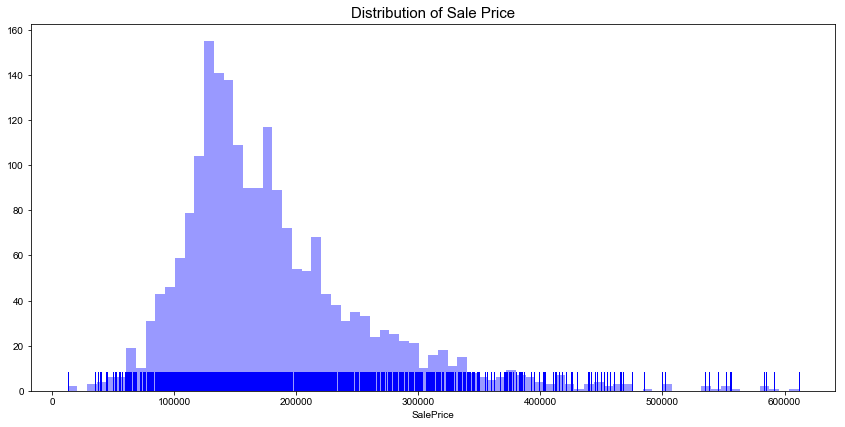

In [21]:
# the distribution plot of SalePrices of the houses
plt.figure(figsize=(12,6))
sns.distplot(train_DF['SalePrice'].dropna() ,kde= False,bins=75 , rug = True ,color='b')
sns.set(font_scale = 1.25)
plt.tight_layout()
plt.title('Distribution of Sale Price')

In [22]:
sp_corr = train_DF.corr()["SalePrice"]
sp_corr_sort = sp_corr.sort_values(axis = 0 , ascending = False)
sp_corr_sort[sp_corr_sort > 0.50]

SalePrice        1.000000
OverallQual      0.800207
GrLivArea        0.697038
GarageArea       0.650270
GarageCars       0.648220
TotalBsmtSF      0.628925
1stFlrSF         0.618486
YearBuilt        0.571849
YearRemod/Add    0.550370
FullBath         0.537969
GarageYrBlt      0.533922
MasVnrArea       0.512230
TotRmsAbvGrd     0.504014
Name: SalePrice, dtype: float64

In [23]:
corr = train_DF[["SalePrice","OverallQual","GrLivArea","GarageCars",
                  "GarageArea","TotalBsmtSF","1stFlrSF","FullBath",
                  "TotRmsAbvGrd","YearBuilt","YearRemod/Add"]].corr()


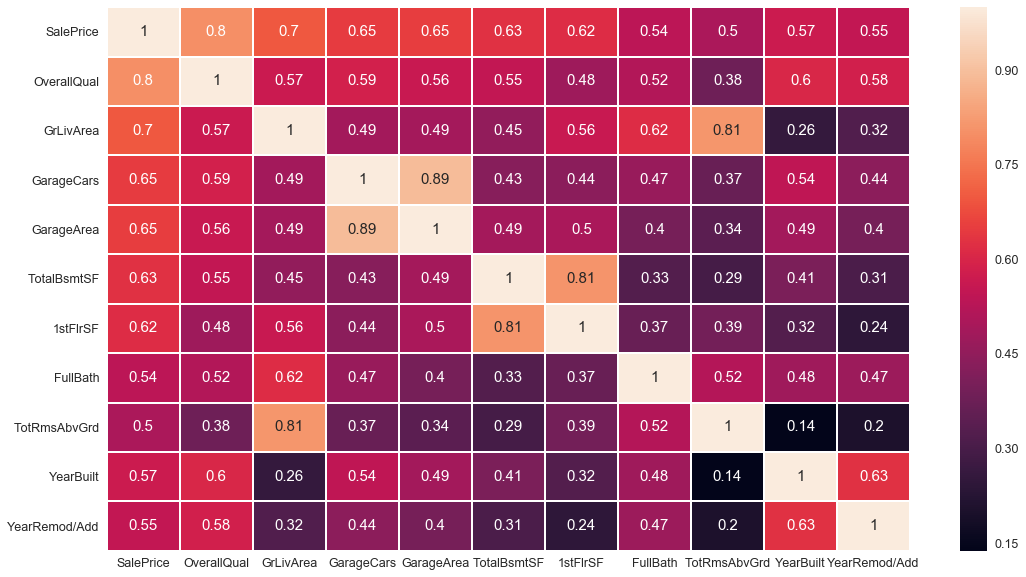

In [24]:
plt.figure(figsize=(18,10))
sns.heatmap(corr, linecolor= "white" , lw =1,annot=True)

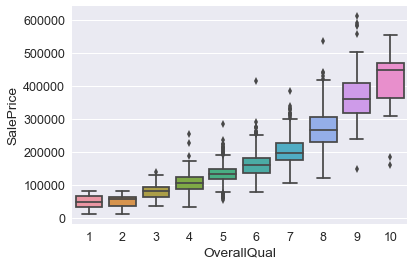

In [25]:
sns.boxplot(train_DF['OverallQual'], train_DF['SalePrice']) 
#top_correlation with Overall_Qual(Overall material and finish quality) 80.02%

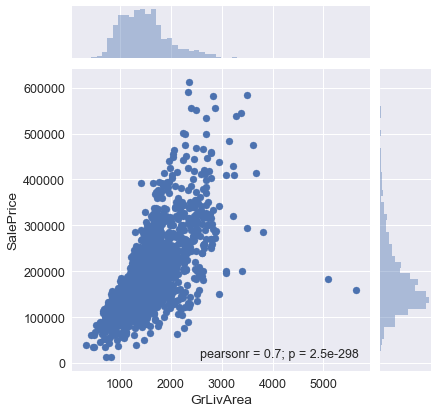

In [26]:
sns.jointplot(train_DF['GrLivArea'], train_DF['SalePrice']);
#top_correlation with Gr Liv Area (GrLivArea: Above grade (ground) living area square feet) 69.70%

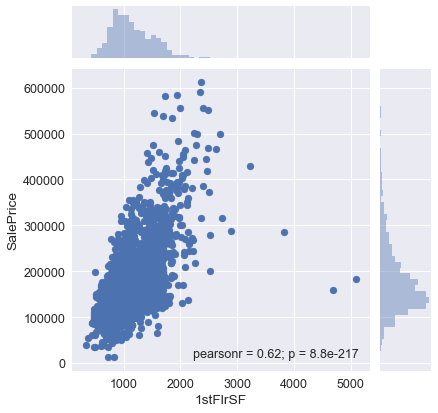

In [27]:
sns.jointplot(train_DF['1stFlrSF'], train_DF['SalePrice']);

Text(0.5,1,'FullBath Area vs SalePrice')

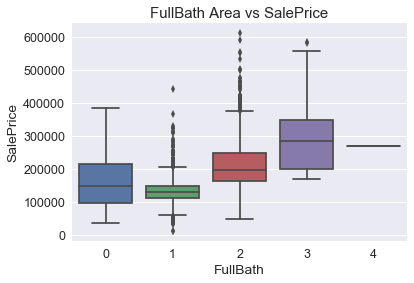

In [28]:
sns.boxplot(y="SalePrice", x="FullBath", data=train_DF)
plt.title('FullBath Area vs SalePrice')

Text(0.5,1,'GarageArea vs SalePrice')

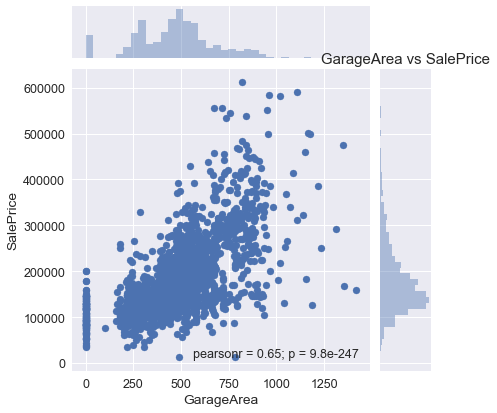

In [29]:
sns.jointplot(y="SalePrice", x="GarageArea", data=train_DF)
plt.title('GarageArea vs SalePrice')

Text(0.5,1,'YearBuilt vs SalePrice')

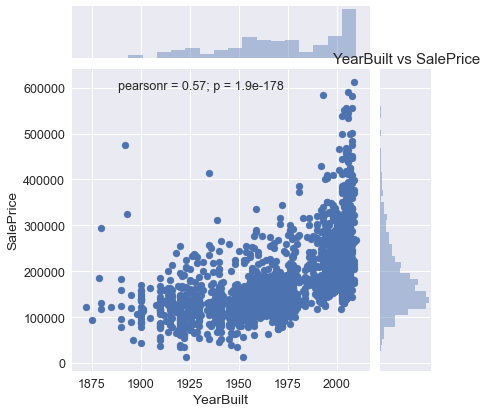

In [30]:
sns.jointplot(y="SalePrice", x="YearBuilt", data=train_DF)
plt.title('YearBuilt vs SalePrice')

In [31]:
#Missing Value imputation
#Categorical variables
#test_DF.select_dtypes(include=['object']).columns

In [32]:
train_DF

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,9,2007,WD,135000


In [33]:
num_feats = ('LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
       'GarageYrBlt', 'GarageCars', 'GarageArea')

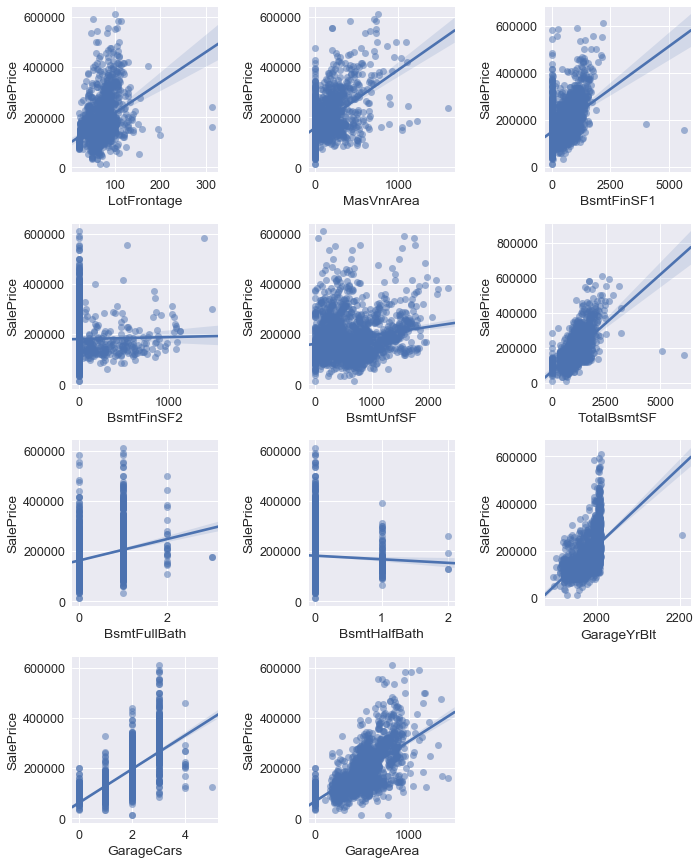

In [34]:
fig = plt.figure(figsize=(10,60))
for i, col in enumerate([f for f in num_feats if not f == 'SalePrice']):
    fig.add_subplot(20,3,i+1)
    sns.regplot(col, 
                train_DF['SalePrice'],
                data=train_DF,
                scatter_kws={'alpha': 0.5}
               )
fig.tight_layout()

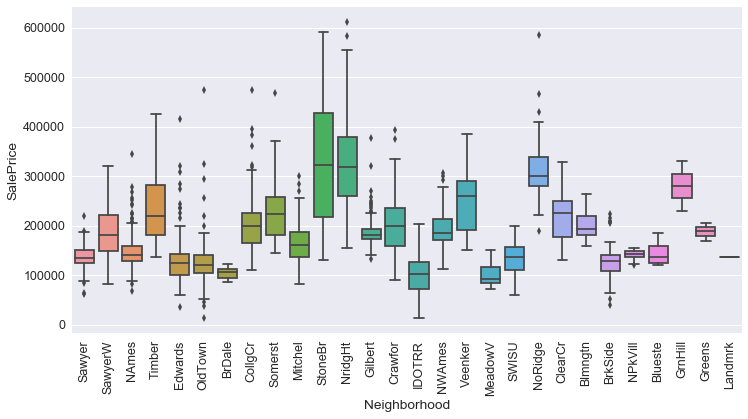

In [35]:
fig = plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = train_DF)
xt = plt.xticks(rotation=90)
fig.savefig('train_DF', bbox_inches='tight')

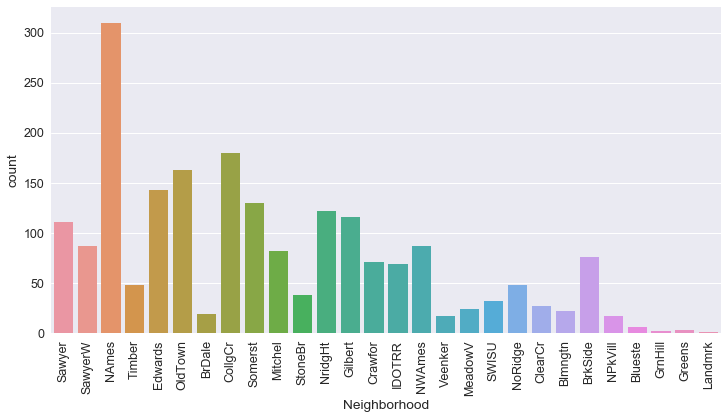

In [36]:
ig = plt.figure(figsize = (12, 6))
sns.countplot(x = 'Neighborhood', data = train_DF)
xt = plt.xticks(rotation=90)
fig.savefig('train_DF', bbox_inches='tight')

Housing Price vs Sales

Sale Type 

# SaleType: Type of sale

WD Warranty Deed - Conventional

CWD Warranty Deed - Cash

VWD Warranty Deed - VA Loan

New Home just constructed and sold

COD Court Officer Deed/Estate

Con Contract 15% Down payment regular terms

ConLw Contract Low Down payment and low interest

ConLI Contract Low Interest

ConLD Contract Low Down

Oth Other

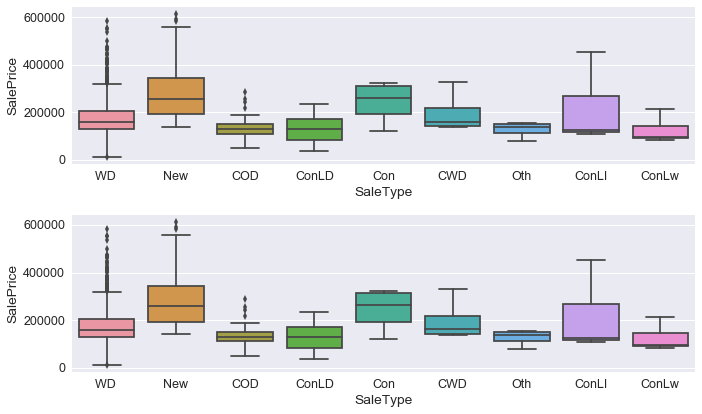

In [37]:
fig, ax = plt.subplots(2, 1, figsize = (10, 6))
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = train_DF, ax = ax[0])
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = train_DF, ax = ax[1])
plt.tight_layout()
fig.savefig('train_DF', bbox_inches='tight')


# Functional: Home functionality rating
    
Typ Typical Functionality

Min1 Minor Deductions 1

Min2 Minor Deductions 2

Mod Moderate Deductions

Maj1 Major Deductions 1

Maj2 Major Deductions 2

Sev Severely Damaged

Sal Salvage only

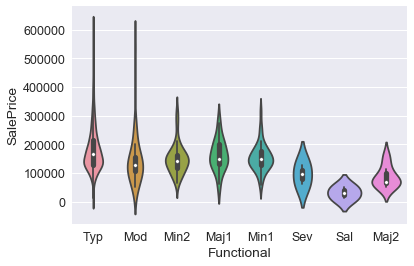

In [38]:
sns.violinplot('Functional', 'SalePrice', data = train_DF);


In [39]:
#Numerical Columns
#train_DF.select_dtypes(include=['float64', 'int64']).columns

In [40]:
#mean_imputer = Imputer(missing_values='NaN', strategy = 'mean', axis=0)
#median_imputer = Imputer(missing_values='NaN', strategy = 'median', axis=0)
#mode_imputer = Imputer(missing_values='NaN', strategy = 'most_frequent', axis=0)

In [41]:
#Missing values in the columns
train_DF.isnull().sum()[train_DF.isnull().sum() != 0].sort_values(ascending=False)

PoolQC          2042
MiscFeature     1986
Alley           1911
Fence           1651
FireplaceQu     1000
LotFrontage      330
GarageYrBlt      114
GarageCond       114
GarageQual       114
GarageFinish     114
GarageType       113
BsmtExposure      58
BsmtFinType2      56
BsmtCond          55
BsmtQual          55
BsmtFinType1      55
MasVnrType        22
MasVnrArea        22
BsmtHalfBath       2
BsmtFullBath       2
GarageCars         1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
GarageArea         1
TotalBsmtSF        1
dtype: int64

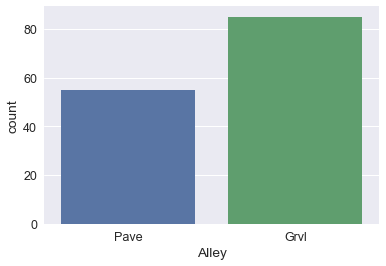

In [42]:
sns.countplot(x = 'Alley' , data = train_DF)

In [43]:
# Impute null values with 0 in select variables - having few nulls and high correlation with SalePrice
train_DF['TotalBsmtSF'].fillna(value=0, inplace=True)
train_DF['GarageArea'].fillna(value=0, inplace=True)
train_DF['GarageCars'].fillna(value=0, inplace=True)

train_DF.isnull().sum()[train_DF.isnull().sum() != 0].sort_values(ascending=False)

PoolQC          2042
MiscFeature     1986
Alley           1911
Fence           1651
FireplaceQu     1000
LotFrontage      330
GarageYrBlt      114
GarageFinish     114
GarageQual       114
GarageCond       114
GarageType       113
BsmtExposure      58
BsmtFinType2      56
BsmtFinType1      55
BsmtCond          55
BsmtQual          55
MasVnrType        22
MasVnrArea        22
BsmtHalfBath       2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
dtype: int64

In [44]:
# Examine value counts for categorical variables with well-distributed/non-skewed data for inclusion in the model
for col in train_DF:
    if np.dtype(train_DF[col]) == object:
        print(col) 
        print(train_DF[col].value_counts())

MSZoning
RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MSZoning, dtype: int64
Street
Pave    2044
Grvl       7
Name: Street, dtype: int64
Alley
Grvl    85
Pave    55
Name: Alley, dtype: int64
LotShape
Reg    1295
IR1     692
IR2      55
IR3       9
Name: LotShape, dtype: int64
LandContour
Lvl    1843
HLS      85
Bnk      80
Low      43
Name: LandContour, dtype: int64
Utilities
AllPub    2049
NoSewr       1
NoSeWa       1
Name: Utilities, dtype: int64
LotConfig
Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: LotConfig, dtype: int64
LandSlope
Gtl    1953
Mod      88
Sev      10
Name: LandSlope, dtype: int64
Neighborhood
NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
SawyerW     87
NWAmes      87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU    

In [45]:
# Create dummies from select categorical variables
train_dums = pd.get_dummies(train_DF[['LotConfig','Neighborhood','BldgType','HouseStyle','ExterQual',\
                                  'ExterCond','CentralAir','KitchenQual']])
train_dums.head()

test_dums = pd.get_dummies(test_DF[['LotConfig','Neighborhood','BldgType','HouseStyle','ExterQual',\
                                  'ExterCond','CentralAir','KitchenQual']])
test_dums.head()

,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,...,ExterCond_Gd,ExterCond_Po,ExterCond_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [46]:
# View dummy column names for potential inclusion into model
train_dums.columns

Index(['LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_Blmngtn',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_Greens',
       'Neighborhood_GrnHill', 'Neighborhood_IDOTRR', 'Neighborhood_Landmrk',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf',
       'HouseStyle

In [47]:
# Correlation of dummies with SalePrice data
train_dums_corr = pd.concat([train_DF['SalePrice'],train_dums], axis=1) # adding SalePrice to the file
train_dums_corr.corr().sort_values('SalePrice',ascending=False)

,SalePrice,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,...,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
SalePrice,1.000000,-0.004793,0.162431,-0.014823,0.014352,-0.082194,0.024900,-0.025226,-0.095305,-0.134790,...,-0.155899,-0.059798,-0.053886,0.122014,-0.277378,0.277378,0.551284,-0.154875,0.306246,-0.540860
KitchenQual_Ex,0.551284,-0.003087,0.010349,-0.015702,0.009530,0.001456,-0.011231,-0.015270,-0.027260,-0.045418,...,-0.031878,-0.053808,-0.008808,0.055505,-0.061839,0.061839,1.000000,-0.043173,-0.226827,-0.287884
ExterQual_Ex,0.493861,-0.011629,0.039174,-0.005490,-0.013462,-0.007682,-0.021114,-0.010983,-0.019608,-0.039777,...,-0.031723,-0.053045,-0.006335,0.049977,-0.055094,0.055094,0.594665,-0.031053,-0.101646,-0.202062
Neighborhood_NridgHt,0.448647,0.034598,-0.048830,-0.006960,0.076865,-0.011195,-0.026187,-0.013622,-0.024318,-0.049333,...,-0.039344,-0.086059,-0.007857,0.098544,-0.068329,0.068329,0.410590,-0.038514,0.055106,-0.256815
ExterQual_Gd,0.446685,-0.028144,0.035706,0.046485,0.030236,-0.018077,0.145132,-0.000743,-0.069378,-0.108048,...,-0.105506,-0.057342,-0.022416,0.102349,-0.178666,0.178666,0.069708,-0.109877,0.638799,-0.627659
KitchenQual_Gd,0.306246,-0.015311,0.059277,0.014343,0.006996,-0.026277,0.119725,-0.006615,-0.067383,-0.083850,...,-0.099729,-0.001598,-0.025138,0.050792,-0.167323,0.167323,-0.226827,-0.123220,1.000000,-0.821655
CentralAir_Y,0.277378,-0.015792,0.063090,0.035732,0.018038,-0.037771,0.028292,0.014717,0.026273,-0.048713,...,-0.222483,0.017491,-0.053250,0.086408,-1.000000,1.000000,0.061839,-0.254580,0.167323,-0.119583
Neighborhood_NoRidge,0.263395,-0.009832,0.065078,0.011402,-0.010277,-0.030430,-0.016119,-0.008385,-0.014969,-0.030367,...,-0.024218,-0.010862,-0.004836,0.022682,-0.042060,0.042060,0.005756,-0.023707,0.159381,-0.151632
Neighborhood_StoneBr,0.256977,-0.023577,0.126763,-0.023851,-0.009121,-0.039605,-0.014307,-0.007442,-0.013286,-0.026952,...,-0.021495,-0.035214,-0.004293,0.032550,-0.037330,0.037330,0.196629,-0.021041,0.030106,-0.125840
HouseStyle_2Story,0.201911,-0.027051,0.021081,0.009588,0.006101,0.006734,-0.066802,0.044705,0.150729,-0.086092,...,-0.051190,-0.033923,-0.020043,0.052417,-0.042868,0.042868,0.040971,-0.040891,0.180109,-0.185138


In [48]:
 #Concatenate dummies columns to main datasets
train_DF= pd.concat([train_DF,train_dums], axis=1)
train_DF.head()

test_DF= pd.concat([test_DF,test_dums], axis=1)
test_DF.head()

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ExterCond_Gd,ExterCond_Po,ExterCond_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,1,0,0,1,0,0,0
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,1,0,1,0,0,0,0,1
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,1,0,1,0,0,1,0,0
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,1,0,1,0,0,0,0,1
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,0,1,0,1,0,0,0,0,1


In [49]:
# First set of features: retain all cols in df except targets and id vars
y = train_DF['SalePrice'].copy()  # target 
X = train_DF.drop(['Id', 'PID'], axis=1)

X_pred = test_DF.drop(['Id', 'PID'], axis=1)

In [50]:
train_DF['Alley'].fillna("No access",inplace = True)

In [51]:
from sklearn.feature_selection import RFE, SelectKBest, f_classif, f_regression

OverallQual: Overall material and finish quality
    
10 Very Excellent

9 Excellent

8 Very Good

7 Good

6 Above Average

5 Average

4 Below Average

3 Fair

2 Poor

1 Very Poo

In [52]:
# Next set of features: numeric cols with corr >= 0.4
y = train_DF['SalePrice'].copy()  # target 
X = train_DF[['OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 
              'YearBuilt', 'YearRemod/Add', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces']].copy()

X_pred = test_DF[['OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 
              'YearBuilt', 'YearRemod/Add', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces']].copy()

In [53]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

# Examine shapes of the training and testing sets from the train dataset
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)
print('X-pred', X_pred.shape)

X_train (1025, 11)
X_test (1026, 11)
y_train (1025,)
y_test (1026,)
X-pred (879, 11)


In [54]:
from sklearn.linear_model import LassoCV

In [55]:
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(X_train,y)

NameError: name 'Lasso' is not defined

In [56]:
# Scale the data
ss = StandardScaler() 
ss.fit(X_train) 
Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)
Xs_pred = ss.transform(X_pred)

In [57]:
from sklearn.linear_model import LassoCV

In [58]:
from sklearn.linear_model import LassoCV

In [113]:
#lasso = Lasso(alpha=lassocv.alpha_)
#lasso.fit(X_train,y_train)

In [60]:
train_DF[train_DF['BsmtCond'].isnull() == True][['BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'BsmtQual','BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF','TotalBsmtSF']]

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,TotalBsmtSF
12,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
93,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
114,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
146,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
240,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
249,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
256,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
390,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
437,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
#Categorical features 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'BsmtQual'

train_DF['BsmtQual'].fillna("No basement" , inplace = True)
train_DF['BsmtCond'].fillna("No basement" , inplace = True)
train_DF['BsmtExposure'].fillna( "No basement", inplace = True)
train_DF['BsmtFinType1'].fillna("No basement", inplace = True)
train_DF['BsmtFinType2'].fillna("No basement" , inplace = True)


In [62]:
#Numerical Features 'BsmtCond','BsmtFinSF1','BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF','TotalBsmtSF'

train_DF['BsmtFinSF1'].fillna(0 , inplace = True)
train_DF['BsmtFinSF2'].fillna(0 , inplace = True)
train_DF['BsmtFullBath'].fillna(0 , inplace = True)
train_DF['BsmtHalfBath'].fillna(0 , inplace = True)
train_DF['BsmtUnfSF'].fillna(0 , inplace = True)
train_DF['TotalBsmtSF'].fillna(0 , inplace = True)

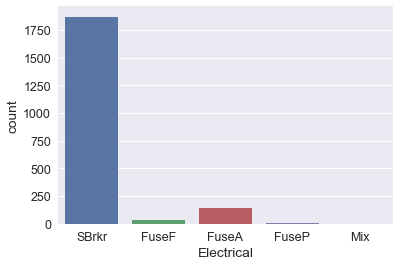

In [63]:
sns.countplot(x = 'Electrical' , data = train_DF)

In [64]:
train_DF['Electrical'].fillna(value = 'SBrkr' , inplace = True)

In [65]:
train_DF['FireplaceQu'].fillna(value = 'None' , inplace =  True)

In [66]:
train_DF[train_DF['FireplaceQu'].isnull() == True][['Fireplaces','FireplaceQu']]

,Fireplaces,FireplaceQu


In [67]:
train_DF[train_DF['GarageType'].isnull() == True][['GarageType','GarageFinish','GarageQual','GarageCond','GarageArea','GarageCars']]

,GarageType,GarageFinish,GarageQual,GarageCond,GarageArea,GarageCars
28,NaN,NaN,NaN,NaN,0.0,0.0
53,NaN,NaN,NaN,NaN,0.0,0.0
65,NaN,NaN,NaN,NaN,0.0,0.0
79,NaN,NaN,NaN,NaN,0.0,0.0
101,NaN,NaN,NaN,NaN,0.0,0.0
103,NaN,NaN,NaN,NaN,0.0,0.0
114,NaN,NaN,NaN,NaN,0.0,0.0
120,NaN,NaN,NaN,NaN,0.0,0.0
134,NaN,NaN,NaN,NaN,0.0,0.0
136,NaN,NaN,NaN,NaN,0.0,0.0


In [68]:
train_DF['GarageType'].fillna("No garage", inplace = True)
train_DF['GarageFinish'].fillna("No garage", inplace = True)
train_DF['GarageQual'].fillna("No garage" , inplace = True)
train_DF['GarageCond'].fillna("No garage", inplace = True)
train_DF['GarageArea'].fillna(0, inplace = True)
train_DF['GarageCars'].fillna( 0 , inplace = True)

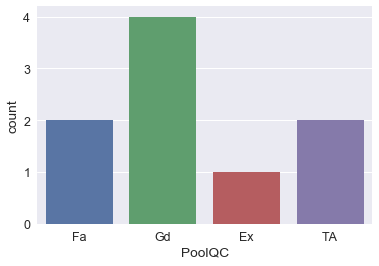

In [69]:
sns.countplot(x = 'PoolQC' , data = train_DF)

In [70]:
train_DF[train_DF['PoolQC'].isnull() == True][['PoolQC','PoolArea']]

,PoolQC,PoolArea
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
5,NaN,0
6,NaN,0
7,NaN,0
8,NaN,0
9,NaN,0


In [71]:
train_DF['PoolQC'].fillna("No pool" , inplace = True)

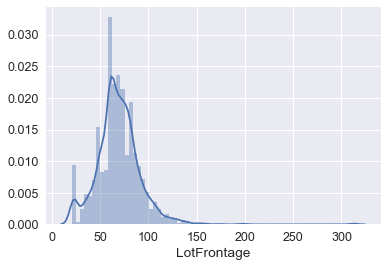

In [72]:
sns.distplot(train_DF['LotFrontage'].dropna() , bins =70);

In [73]:
train_DF['LotFrontage'] = train_DF['LotFrontage'].transform(lambda x: x.fillna(x.mode()[0]))

In [74]:
train_DF['MiscFeature'] = train_DF['MiscFeature'].fillna('None')
train_DF['Exterior1st'].fillna('None', inplace = True)
train_DF['Exterior2nd'].fillna('None', inplace = True)
train_DF['Functional'].fillna('None', inplace = True)
train_DF['KitchenQual'].fillna('None' , inplace = True)
train_DF['MSZoning'].fillna( 'None' , inplace = True)
train_DF['SaleType'].fillna( 'None' , inplace = True)
train_DF['Utilities'].fillna( 'None' , inplace = True)
train_DF["MasVnrType"] = train_DF["MasVnrType"].fillna('None')
train_DF["MasVnrArea"] = train_DF["MasVnrArea"].fillna(0)
train_DF["Fence"] = train_DF["Fence"].fillna('None')


In [75]:
train_DF.columns[train_DF.isnull().any()].isnull().sum()

0

In [76]:
train_DF.isnull().sum()

Id                      0
PID                     0
MSSubClass              0
MSZoning                0
LotFrontage             0
LotArea                 0
Street                  0
Alley                   0
LotShape                0
LandContour             0
Utilities               0
LotConfig               0
LandSlope               0
Neighborhood            0
Condition1              0
Condition2              0
BldgType                0
HouseStyle              0
OverallQual             0
OverallCond             0
YearBuilt               0
YearRemod/Add           0
RoofStyle               0
RoofMatl                0
Exterior1st             0
Exterior2nd             0
MasVnrType              0
MasVnrArea              0
ExterQual               0
ExterCond               0
                       ..
Neighborhood_Timber     0
Neighborhood_Veenker    0
BldgType_1Fam           0
BldgType_2fmCon         0
BldgType_Duplex         0
BldgType_Twnhs          0
BldgType_TwnhsE         0
HouseStyle_1

In [77]:
train_DF.head()

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,109,533352170,60,RL,60.0,13517,Pave,No access,IR1,Lvl,...,0,0,0,1,0,1,0,0,1,0
1,544,531379050,60,RL,43.0,11492,Pave,No access,IR1,Lvl,...,0,0,0,1,0,1,0,0,1,0
2,153,535304180,20,RL,68.0,7922,Pave,No access,Reg,Lvl,...,0,1,0,0,0,1,0,0,1,0
3,318,916386060,60,RL,73.0,9802,Pave,No access,Reg,Lvl,...,0,0,0,1,0,1,0,0,0,1
4,255,906425045,50,RL,82.0,14235,Pave,No access,IR1,Lvl,...,0,0,0,1,0,1,0,0,0,1


In [78]:
train_DF= pd.get_dummies(train_DF, drop_first=True)
train_DF.head()

,Id,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,...,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,109,533352170,60,60.0,13517,6,8,1976,2005,289.0,...,0,0,0,0,0,0,0,0,0,1
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,0,0,0,0,0,0,0,0,0,1
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,0,0,0,0,0,0,0,0,0,1


In [79]:
test_DF= pd.get_dummies(test_DF, drop_first=True)
test_DF.head()

,Id,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,...,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD
0,2658,902301120,190,69.0,9142,6,8,1910,1950,0.0,...,0,0,0,0,0,0,0,0,0,1
1,2718,905108090,90,NaN,9662,5,4,1977,1977,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2414,528218130,60,58.0,17104,7,5,2006,2006,0.0,...,0,0,0,0,0,0,1,0,0,0
3,1989,902207150,30,60.0,8520,5,6,1923,2006,0.0,...,0,0,0,0,0,0,0,0,0,1
4,625,535105100,20,NaN,9500,6,5,1963,1963,247.0,...,0,0,0,0,0,0,0,0,0,1


In [80]:
#Converting Categorical variables to numeric
categorical = train_DF.select_dtypes(exclude=['float64', 'int64'])

In [81]:
categorical = test_DF.select_dtypes(exclude=['float64', 'int64'])

In [82]:
test_DF.head()

,Id,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,...,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD
0,2658,902301120,190,69.0,9142,6,8,1910,1950,0.0,...,0,0,0,0,0,0,0,0,0,1
1,2718,905108090,90,NaN,9662,5,4,1977,1977,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2414,528218130,60,58.0,17104,7,5,2006,2006,0.0,...,0,0,0,0,0,0,1,0,0,0
3,1989,902207150,30,60.0,8520,5,6,1923,2006,0.0,...,0,0,0,0,0,0,0,0,0,1
4,625,535105100,20,NaN,9500,6,5,1963,1963,247.0,...,0,0,0,0,0,0,0,0,0,1


In [83]:
train_DF.head(2000)

,Id,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,...,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,109,533352170,60,60.0,13517,6,8,1976,2005,289.0,...,0,0,0,0,0,0,0,0,0,1
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,0,0,0,0,0,0,0,0,0,1
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,0,0,0,0,0,0,0,0,0,1
5,138,535126040,20,137.0,16492,6,6,1966,2002,0.0,...,0,0,0,0,0,0,0,0,0,1
6,2827,908186070,180,35.0,3675,6,5,2005,2006,82.0,...,0,0,0,0,0,0,0,1,0,0
7,145,535154050,20,60.0,12160,5,5,1959,1959,180.0,...,0,0,0,0,0,0,0,0,0,0
8,1942,535353130,20,60.0,15783,5,5,1952,1952,0.0,...,1,0,0,0,0,0,0,0,0,1
9,1956,535426130,60,70.0,11606,5,5,1969,1969,192.0,...,0,0,0,0,0,0,0,0,0,1


In [84]:
train_DF.head()

,Id,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,...,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,109,533352170,60,60.0,13517,6,8,1976,2005,289.0,...,0,0,0,0,0,0,0,0,0,1
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,0,0,0,0,0,0,0,0,0,1
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,0,0,0,0,0,0,0,0,0,1


In [85]:
#New_Train_DF = DF[:2051]
#X_train = New_Train_DF.drop('SalePrice',axis=1)
#y_train = New_Train_DF['SalePrice']

In [86]:
#New_Test_DF = DF[2051:]
#X_test = New_Test_DF.drop('SalePrice',axis=1)

In [87]:
#New_Test_DF.head()

In [88]:
#X_test.shape

In [89]:
#X_train.shape

In [90]:
train_DF.shape

(2051, 325)

In [91]:
test_DF.head()

,Id,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,...,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD
0,2658,902301120,190,69.0,9142,6,8,1910,1950,0.0,...,0,0,0,0,0,0,0,0,0,1
1,2718,905108090,90,NaN,9662,5,4,1977,1977,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2414,528218130,60,58.0,17104,7,5,2006,2006,0.0,...,0,0,0,0,0,0,1,0,0,0
3,1989,902207150,30,60.0,8520,5,6,1923,2006,0.0,...,0,0,0,0,0,0,0,0,0,1
4,625,535105100,20,NaN,9500,6,5,1963,1963,247.0,...,0,0,0,0,0,0,0,0,0,1


In [92]:
test_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Columns: 291 entries, Id to SaleType_WD 
dtypes: float64(11), int64(27), uint8(253)
memory usage: 478.2 KB


In [93]:
test_DF["LotFrontage"].fillna(test_DF["LotFrontage"].mean, inplace=True)

In [94]:
test_DF["MasVnrArea"].fillna(0,inplace=True)

In [95]:
test_DF["BsmtFinSF2"].fillna(0,inplace=True)

In [96]:
train_DF["BsmtUnfSF"].fillna(0,inplace=True)

In [97]:
train_DF["TotalBsmtSF"].fillna(0,inplace=True)


In [98]:
test_DF["BsmtFullBath"].fillna(0,inplace=True)

In [99]:
test_DF["BsmtHalfBath"].fillna(0,inplace=True)


In [100]:
# Correlation of dummies with SalePrice data
train_dums_corr = pd.concat([train_DF['SalePrice'],train_dums], axis=1) # adding SalePrice to the file
train_dums_corr.corr().sort_values('SalePrice',ascending=False)

,SalePrice,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,...,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
SalePrice,1.000000,-0.004793,0.162431,-0.014823,0.014352,-0.082194,0.024900,-0.025226,-0.095305,-0.134790,...,-0.155899,-0.059798,-0.053886,0.122014,-0.277378,0.277378,0.551284,-0.154875,0.306246,-0.540860
KitchenQual_Ex,0.551284,-0.003087,0.010349,-0.015702,0.009530,0.001456,-0.011231,-0.015270,-0.027260,-0.045418,...,-0.031878,-0.053808,-0.008808,0.055505,-0.061839,0.061839,1.000000,-0.043173,-0.226827,-0.287884
ExterQual_Ex,0.493861,-0.011629,0.039174,-0.005490,-0.013462,-0.007682,-0.021114,-0.010983,-0.019608,-0.039777,...,-0.031723,-0.053045,-0.006335,0.049977,-0.055094,0.055094,0.594665,-0.031053,-0.101646,-0.202062
Neighborhood_NridgHt,0.448647,0.034598,-0.048830,-0.006960,0.076865,-0.011195,-0.026187,-0.013622,-0.024318,-0.049333,...,-0.039344,-0.086059,-0.007857,0.098544,-0.068329,0.068329,0.410590,-0.038514,0.055106,-0.256815
ExterQual_Gd,0.446685,-0.028144,0.035706,0.046485,0.030236,-0.018077,0.145132,-0.000743,-0.069378,-0.108048,...,-0.105506,-0.057342,-0.022416,0.102349,-0.178666,0.178666,0.069708,-0.109877,0.638799,-0.627659
KitchenQual_Gd,0.306246,-0.015311,0.059277,0.014343,0.006996,-0.026277,0.119725,-0.006615,-0.067383,-0.083850,...,-0.099729,-0.001598,-0.025138,0.050792,-0.167323,0.167323,-0.226827,-0.123220,1.000000,-0.821655
CentralAir_Y,0.277378,-0.015792,0.063090,0.035732,0.018038,-0.037771,0.028292,0.014717,0.026273,-0.048713,...,-0.222483,0.017491,-0.053250,0.086408,-1.000000,1.000000,0.061839,-0.254580,0.167323,-0.119583
Neighborhood_NoRidge,0.263395,-0.009832,0.065078,0.011402,-0.010277,-0.030430,-0.016119,-0.008385,-0.014969,-0.030367,...,-0.024218,-0.010862,-0.004836,0.022682,-0.042060,0.042060,0.005756,-0.023707,0.159381,-0.151632
Neighborhood_StoneBr,0.256977,-0.023577,0.126763,-0.023851,-0.009121,-0.039605,-0.014307,-0.007442,-0.013286,-0.026952,...,-0.021495,-0.035214,-0.004293,0.032550,-0.037330,0.037330,0.196629,-0.021041,0.030106,-0.125840
HouseStyle_2Story,0.201911,-0.027051,0.021081,0.009588,0.006101,0.006734,-0.066802,0.044705,0.150729,-0.086092,...,-0.051190,-0.033923,-0.020043,0.052417,-0.042868,0.042868,0.040971,-0.040891,0.180109,-0.185138


In [101]:
# Concatenate dummies columns to main datasets
train_DF = pd.concat([train_DF,train_dums], axis=1)
train_DF.head()


,Id,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,...,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,109,533352170,60,60.0,13517,6,8,1976,2005,289.0,...,0,0,0,1,0,1,0,0,1,0
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,0,0,0,1,0,1,0,0,1,0
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,0,1,0,0,0,1,0,0,1,0
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,0,0,0,1,0,1,0,0,0,1
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,0,0,0,1,0,1,0,0,0,1


In [102]:
test_DF= pd.concat([test_DF,test_dums], axis=1)
test_DF.head()

,Id,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,...,ExterCond_Gd,ExterCond_Po,ExterCond_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA
0,2658,902301120,190,69.0,9142,6,8,1910,1950,0.0,...,0,0,0,1,0,0,1,0,0,0
1,2718,905108090,90,NaN,9662,5,4,1977,1977,0.0,...,0,0,1,0,1,0,0,0,0,1
2,2414,528218130,60,58.0,17104,7,5,2006,2006,0.0,...,0,0,1,0,1,0,0,1,0,0
3,1989,902207150,30,60.0,8520,5,6,1923,2006,0.0,...,0,0,1,0,1,0,0,0,0,1
4,625,535105100,20,NaN,9500,6,5,1963,1963,247.0,...,0,0,1,0,1,0,0,0,0,1


In [103]:
from sklearn.feature_selection import RFE, SelectKBest, f_classif, f_regression

In [104]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

# Examine shapes of the training and testing sets from the train dataset
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)
print('X-pred', X_pred.shape)

X_train (1025, 11)
X_test (1026, 11)
y_train (1025,)
y_test (1026,)
X-pred (879, 11)


In [105]:
 from sklearn.linear_model import LassoCV

In [106]:
# Scale the data
ss = StandardScaler() 
ss.fit(X_train) 
Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)
Xs_pred = ss.transform(X_pred)

In [107]:
# Linear Regression
linreg = LinearRegression()
model = linreg.fit(Xs_train,y_train)
score = linreg.score(Xs_test,y_test)
print('R^2: ', score)

R^2:  0.8140032594793059


In [108]:
# examine the coefficients
print('Coefficients: ')
print(linreg.coef_)
print('')

# make predictions on the test split from the training dataset
y_hat = linreg.predict(Xs_test)
rmse = sqrt(mean_squared_error(y_test, y_hat))
print('RMSE:', rmse)
print('')

# make predictions on the testing dataset
y_pred = linreg.predict(Xs_pred)
print('Predictions: ', y_pred)

Coefficients: 
[30062.80699817 13571.68978861  6223.13024408  5406.27726808
  6007.48085947  4658.68084376  8016.3554798   7212.57462677
 -1596.0972158   4654.79365521  9107.21311075]

RMSE: 33798.343141731726

Predictions:  [150091.03323431 195469.43500792 211846.33207784 126610.50971663
 196881.52245528  87890.84033538 106780.633595   136594.44715659
 198426.21849436 194567.99937302 169798.7410629  141999.92021126
 171348.10215969 290815.93973814 177505.7275594  143822.60671426
 187017.64978286 112444.1364752  213844.49156853 210994.34395031
 145649.38456811 123181.33123458 206919.24174899 174504.36622808
 208529.72046221 112052.62963996 132981.38473902 122430.50851964
 148761.74415704  20145.19191783  97054.52809117  91516.59637633
 254335.19004774 161448.59610936 230967.01178247 193550.93642937
 128416.37965437  80895.54597432 116127.85023009 206403.36438437
 164736.75955236 233138.78147118 159276.90398403 166282.55232087
 231603.24221467 111185.77088321 225223.94499479 112540.7343

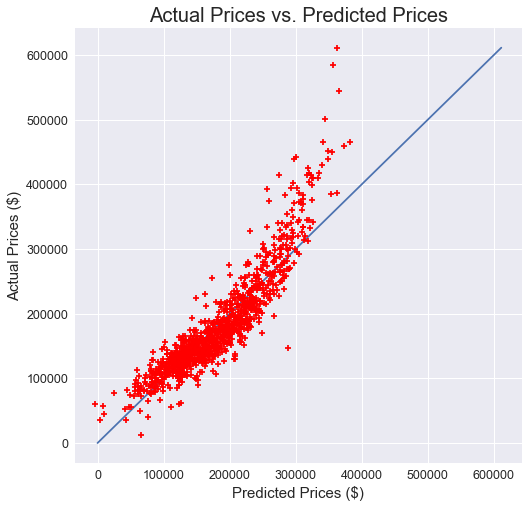

In [109]:
# Scatterplot of Actual Prices vs. Predicted Prices

# Y - Y_hat
predictions  =  model.predict(X)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(y_hat, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Prices ($)", size=15)
plt.ylabel("Actual Prices ($)", size=15)
plt.title("Actual Prices vs. Predicted Prices", size=20)

plt.plot([0, np.max(y)], [0, np.max(y)])

plt.show()

In [110]:
# Create predictions dataframe for Kaggle
predictions = pd.DataFrame(y_pred, columns=['SalePrice'])
predictions = pd.concat([test_DF['Id'].to_frame(),predictions],axis=1)
predictions.to_csv('regression_submission.csv', index=False)


In [111]:
predictions.head(2000)

,Id,SalePrice
0,2658,150091.033234
1,2718,195469.435008
2,2414,211846.332078
3,1989,126610.509717
4,625,196881.522455
5,333,87890.840335
6,1327,106780.633595
7,858,136594.447157
8,95,198426.218494
9,1568,194567.999373


In [112]:
predictions.shape


(879, 2)